In [27]:
import pandas as pd
import numpy as np 
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans

# Intro

The purpose of this project is to use python to help perform EDA on the dataset. To find common purchasing trends among the customers such as perfered time of buying or creating new features, such as seeing if a person bought items in bulk, to also help analysis a customers buying behavior. 

Then by using Sklearn KMeans algorithmn and RFM clustering we can separate customers into group and anaylsis their purchasing behavior on a deeper level. From there we can see identity the type of customers that group is and provide brief advice on what the company should do to keep them or help them engage with the retail site more.

The data was downloaded from UCI ML Repo. 

Citation: Chen,Daqing. (2015). Online Retail. UCI Machine Learning Repository. https://doi.org/10.24432/C5BW33.

In [4]:
main_df = pd.read_excel('Online Retail.xlsx')
main_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **Data Cleaning**

In [28]:
main_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We can see that there are a lot of NA values for _customer id_. Given we will eventually cluster the data based on the customers we should drop the NA values

In [35]:
query = """
SELECT InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CAST(CustomerID AS INTEGER) AS CustomerID, Country  
FROM main_df 
WHERE CustomerID IS NOT Null     
"""

dropped_NA_cusID =psql.sqldf(query, locals())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.000000,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.000000,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.000000,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00.000000,0.85,12680,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00.000000,2.10,12680,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00.000000,4.15,12680,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00.000000,4.15,12680,France


In [42]:
dropped_NA_cusID = main_df[~(main_df["CustomerID"].isna())]
dropped_NA_cusID.loc[:,"CustomerID"] = dropped_NA_cusID["CustomerID"].astype(int)
dropped_NA_cusID

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [36]:
dropped_NA_cusID.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

By getting rid of the customer ids with Null values we no longer have any other null values in the data set

Lets take a deeper dive into the stock codes,specifically the ones with code 'M'

In [9]:
cleaned_df = dropped_NA_cusID[~(dropped_NA_cusID["StockCode"] == 'M')]
dropped_NA_cusID[dropped_NA_cusID["StockCode"] == 'M'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327,United Kingdom


A _stockCode_ of M means someone adjusted the invoice, this does not give any insight on the customers behavior since there is no futher info on why there had to be some adjusting, so we can take out these records. 

In [43]:
temp_date_series = pd.to_datetime(cleaned_df["InvoiceDate"]).dt.strftime('%Y-%m-%d')
cleaned_df.loc[:,"InvoiceDate"] = pd.to_datetime(temp_date_series)
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,December
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,December


# Data Engineering 

Lets add in some features (such as the month of the invoice, total cost of the item, if the item was a bulk buy )  to help understand the customer's behavior

First lets encode the months 

In [44]:
cleaned_df.loc[:,"InvoiceMonth"]=pd.to_datetime(cleaned_df["InvoiceDate"]).dt.month_name()
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,December
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,December


In [13]:
months_encoded = pd.get_dummies(cleaned_df,columns= ['InvoiceMonth'], prefix= [""], prefix_sep="")
months_encoded

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,April,August,December,February,January,July,June,March,May,November,October,September
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,False,False,True,False,False,False,False,False,False,False,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,False,False,True,False,False,False,False,False,False,False,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,False,False,True,False,False,False,False,False,False,False,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,False,False,True,False,False,False,False,False,False,False,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,False,False,True,False,False,False,False,False,False,False,False,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,False,False,True,False,False,False,False,False,False,False,False,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,False,False,True,False,False,False,False,False,False,False,False,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,False,False,True,False,False,False,False,False,False,False,False,False


Before moving on lets see the distribution of the months. 

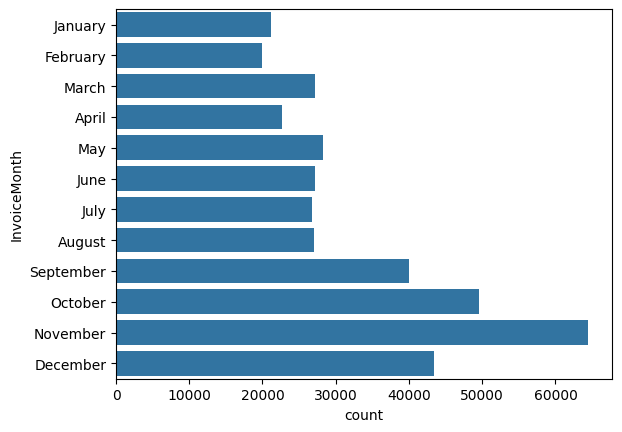

In [14]:
no_returns =  cleaned_df[cleaned_df["Quantity"] > 0 ]
# we want to see the records in which the customer bought an item not returned 
sns.barplot(no_returns["InvoiceMonth"].value_counts(), order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], orient= "h")
plt.show()

We can see a steady trend that as the year goes on more and more items are being bought. It makes the most sense that Novemeber that the highest count of item since people are buying gifts or party items for christmas and/or New Years. At this point it seems the customers are more than likely holiday shoppers.

Now lets get the total cost per item, unit price x quantity.

In [15]:
months_encoded["TotalPrice"] = months_encoded["Quantity"] * months_encoded["UnitPrice"]
months_encoded

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,April,August,...,February,January,July,June,March,May,November,October,September,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,False,False,...,False,False,False,False,False,False,False,False,False,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,False,False,...,False,False,False,False,False,False,False,False,False,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,False,False,...,False,False,False,False,False,False,False,False,False,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,False,False,...,False,False,False,False,False,False,False,False,False,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,False,False,...,False,False,False,False,False,False,False,False,False,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,False,False,...,False,False,False,False,False,False,False,False,False,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,False,False,...,False,False,False,False,False,False,False,False,False,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,False,False,...,False,False,False,False,False,False,False,False,False,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,False,False,...,False,False,False,False,False,False,False,False,False,16.60


Let us see the buying habits of each customer. One habit we can see is if they are bulk buyers, to see the distribution of the _quantity_ column let us get rid of records that have a negative quantity.

In [16]:
no_neg = months_encoded[months_encoded["Quantity"] > 0]
no_neg["Quantity"]

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 397634, dtype: int64

In [17]:
no_neg["Quantity"].describe()

count    397634.000000
mean         13.013266
std         180.447106
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Based on the output in the cell prior we can see that way over half of the customers buy at most 12 of an item, for the purposes of this dataset we can say anything 20 and above can be considered a bulk buy. 

We will not care about the invoices with negative quantities since there is no data to suggest if it was a cancelation or return. Nor do we know why such an order had to be cancelled or return. Ignoring the negative quantites will not be of harm in the future since we only care how they buy.   

In [18]:
def bulk_buyers(data):
    # input: a number representing Quantities of the items bought 
    # outpt: 1 if it is a bulk buy (at least 20) and 0 otherwise 
    if data >= 20:
        return 1
    else:
        return 0

months_encoded["Bulk"] = months_encoded["Quantity"].apply(bulk_buyers)
bulk_data = months_encoded[months_encoded["Quantity"] > 0]["Bulk"].replace({1: "bulk", 0:"non-bulk"})
bulk_data

0         non-bulk
1         non-bulk
2         non-bulk
3         non-bulk
4         non-bulk
            ...   
541904    non-bulk
541905    non-bulk
541906    non-bulk
541907    non-bulk
541908    non-bulk
Name: Bulk, Length: 397634, dtype: object

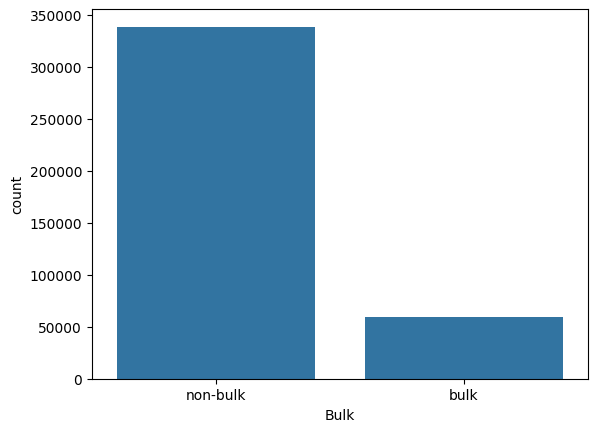

In [19]:
sns.barplot(bulk_data.value_counts())
plt.show()

Here we can see that majority of the buys are of a small scale, majority of customers does not make bulk buys from this online retail

Now we will roll up the data such that each record is a customer's order. This way we can add in another feature that shows how recent the order was made compared to the last order made overall.

In [20]:
grouped_invoices_cusID = months_encoded.groupby(["InvoiceNo", "CustomerID","InvoiceDate","Country"]).agg(
    {'January': 'sum',
        'February': 'sum',
        'March': 'sum',
        'April': 'sum',
        'May': 'sum',
        'June': 'sum',
        'July': 'sum',
        'August': 'sum',
        'September': 'sum',
        'October': 'sum',
        'November': 'sum',
        'December': 'sum',
        'TotalPrice': 'sum',
        'Bulk': 'sum'    
}).reset_index()
grouped_invoices_cusID

,InvoiceNo,CustomerID,InvoiceDate,Country,January,February,March,April,May,June,July,August,September,October,November,December,TotalPrice,Bulk
0,536365,17850,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,7,139.12,0
1,536366,17850,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,2,22.20,0
2,536367,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,12,278.73,1
3,536368,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,4,70.05,0
4,536369,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,17.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,C581470,17924,2011-12-08,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-8.32,0
21997,C581484,16446,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-168469.60,0
21998,C581490,14397,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,2,-32.53,0
21999,C581568,15311,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-54.75,0


In [21]:
most_recent_data = grouped_invoices_cusID["InvoiceDate"].max()
temp_diff = most_recent_data - grouped_invoices_cusID["InvoiceDate"]
grouped_invoices_cusID["DaysSinceRecentInvoice"] = temp_diff.dt.days
grouped_invoices_cusID

,InvoiceNo,CustomerID,InvoiceDate,Country,January,February,March,April,May,June,July,August,September,October,November,December,TotalPrice,Bulk,DaysSinceRecentInvoice
0,536365,17850,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,7,139.12,0,373
1,536366,17850,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,2,22.20,0,373
2,536367,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,12,278.73,1,373
3,536368,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,4,70.05,0,373
4,536369,13047,2010-12-01,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,17.85,0,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,C581470,17924,2011-12-08,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-8.32,0,1
21997,C581484,16446,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-168469.60,0,0
21998,C581490,14397,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,2,-32.53,0,0
21999,C581568,15311,2011-12-09,United Kingdom,0,0,0,0,0,0,0,0,0,0,0,1,-54.75,0,0


Now it is time to roll up the data to have each unique record be a customer. Note some of the customers resided in two different countries so we will group on both country and customerid so those customers are treated as different customers. Since location could change how someone shops.

In [22]:
grp_cusID = grouped_invoices_cusID.groupby(["CustomerID", "Country"]).agg(
    {
        'January': 'sum',
        'February': 'sum',
        'March': 'sum',
        'April': 'sum',
        'May': 'sum',
        'June': 'sum',
        'July': 'sum',
        'August': 'sum',
        'September': 'sum',
        'October': 'sum',
        'November': 'sum',
        'December': 'sum',
        'TotalPrice': 'sum',
        'Bulk': 'sum',
        'CustomerID': 'count',
        'DaysSinceRecentInvoice': 'min'   
    })
grp_cusID.rename(columns={"CustomerID": "Frequency"}, inplace= True)
grp_cusID

,,January,February,March,April,May,June,July,August,September,October,November,December,TotalPrice,Bulk,Frequency,DaysSinceRecentInvoice
CustomerID,Country,,,,,,,,,,,,,,,,
12346,United Kingdom,2,0,0,0,0,0,0,0,0,0,0,0,0.00,1,2,325
12347,Iceland,29,0,0,24,0,18,0,22,0,47,0,42,4310.00,39,7,2
12348,Finland,6,0,0,5,0,0,0,0,3,0,0,17,1797.24,27,4,75
12349,Italy,0,0,0,0,0,0,0,0,0,0,73,0,1757.55,5,1,18
12350,Norway,0,17,0,0,0,0,0,0,0,0,0,0,334.40,1,1,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,United Kingdom,0,0,10,0,0,0,0,0,0,0,0,0,180.60,0,1,277
18281,United Kingdom,0,0,0,0,0,7,0,0,0,0,0,0,80.82,0,1,180
18282,United Kingdom,0,0,0,0,0,0,0,8,0,0,0,5,176.60,1,3,7


# Clustering the Data

We will cluster the data two ways, first way is by using K-Means and the other using RFM scores.

## Kmeans
 

We will do the elbow method to see the optimal number of clustering for the k-means clustering algorithmn. 

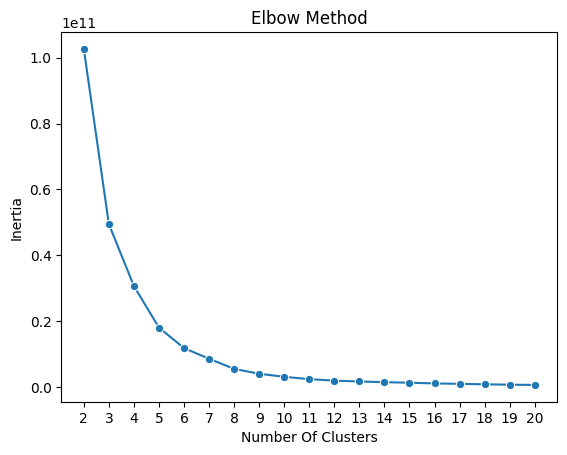

In [45]:
KMeans_df = grp_cusID.copy()

lst_inertia =  []
for k in np.arange(2,21):
    kmeans_cluster = KMeans(n_clusters=k,n_init= 10)
    kmeans_cluster.fit(KMeans_df)
    lst_inertia.append(kmeans_cluster.inertia_)

df_interia =  pd.DataFrame({"Number Of Clusters": np.arange(2,21), "Inertia": lst_inertia})
df_interia
sns.lineplot(df_interia, x = "Number Of Clusters", y= "Inertia", marker= "o")
plt.xticks(np.arange(2,21))
plt.title("Elbow Method")
plt.show()

In [24]:
main_kmeans = KMeans(n_clusters= 6, n_init=10)
main_kmeans.fit(KMeans_df)
KMeans_df["Cluster"] =main_kmeans.labels_
KMeans_df["Cluster"].value_counts()

Cluster
2    3922
0     394
4      37
5      12
3       4
1       2
Name: count, dtype: int64

### Analysis 

sidenote: We see that clusters 1 and 3 have a very small grouping making it unideal for some for some of the visualization so instead we will just see their values and draw conclusions from that. 

In [25]:
months_dist_df = pd.DataFrame(columns=["Month", "Count", "Cluster"])
for i in np.arange(6):
    temp_df =  KMeans_df[KMeans_df["Cluster"] == i]
    months_accum = temp_df.iloc[:,0:12].sum()
    months_accum_df = pd.DataFrame(months_accum, columns=["Count"]).reset_index(names = "Month")
    months_accum_df["Cluster"] = np.ones(12, dtype = int) * i
    months_dist_df = pd.concat([months_dist_df, months_accum_df], ignore_index= True)
months_dist_df

,Month,Count,Cluster
0,January,7281,0
1,February,6230,0
2,March,8699,0
3,April,6788,0
4,May,9732,0
...,...,...,...
67,August,647,5
68,September,1730,5
69,October,2689,5
70,November,2762,5


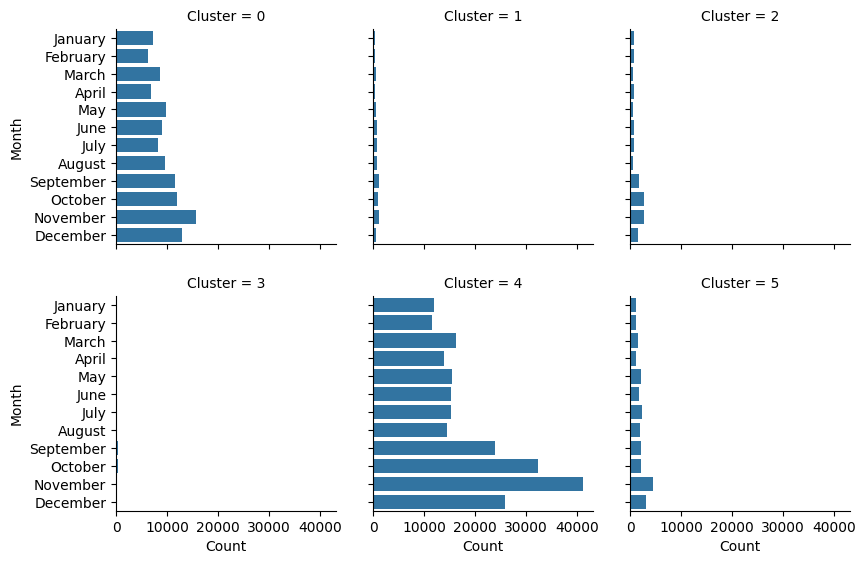

In [244]:
months_visual = sns.FacetGrid(months_dist_df,col='Cluster', col_wrap= 3)
months_visual.map(sns.barplot,"Count","Month", orient= "h", order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
months_visual.tight_layout(pad=2.0)
plt.show()

In [349]:
def make_hist_plots(columnName):
    for i in np.arange(6):
        temp_df = KMeans_df[KMeans_df["Cluster"] == i]
        if i in [1,3]:
            arr_data = temp_df[columnName].to_numpy()
            print(f"Cluster {i} {columnName} data: {arr_data}")
        else:
            sns.histplot(temp_df, x = columnName)
            plt.title(f"Cluster {i}:{columnName}")
            plt.show()

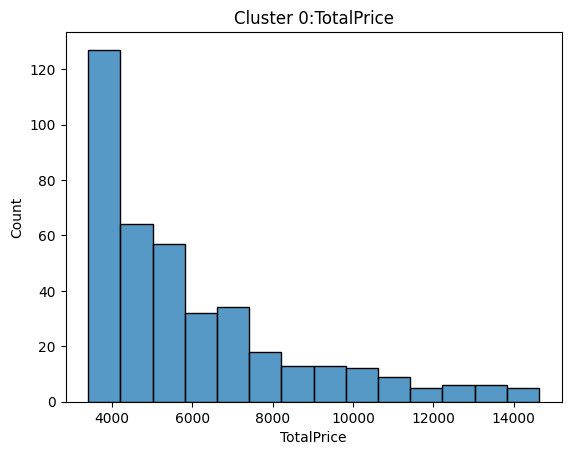

Cluster 1 TotalPrice data: [123725.45 114505.32 132572.62 188712.33]


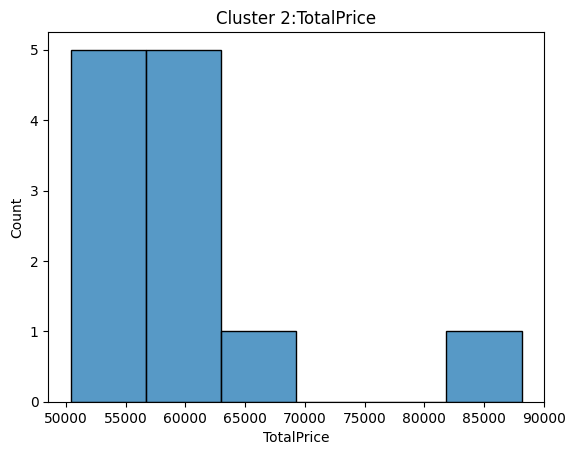

Cluster 3 TotalPrice data: [279594.62 259657.3 ]


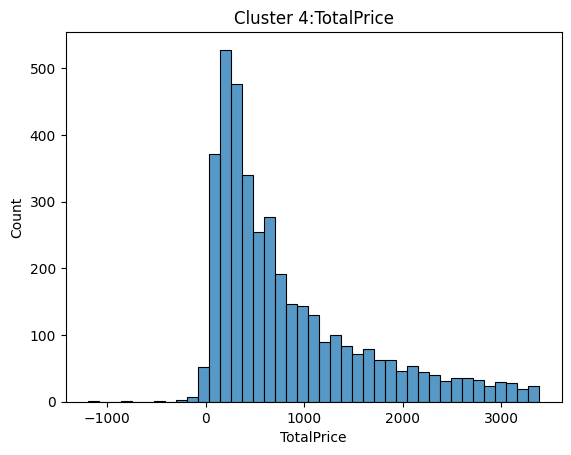

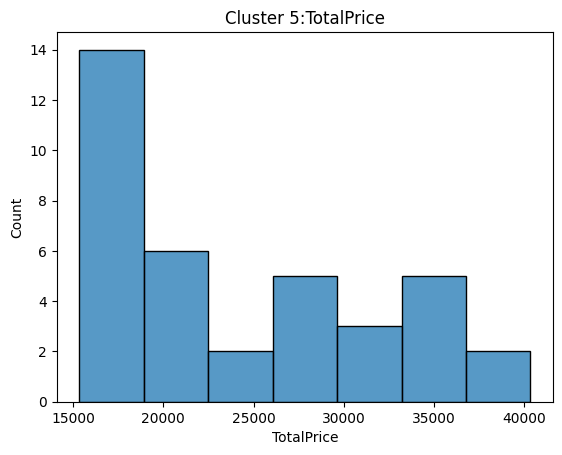

In [350]:
make_hist_plots("TotalPrice")

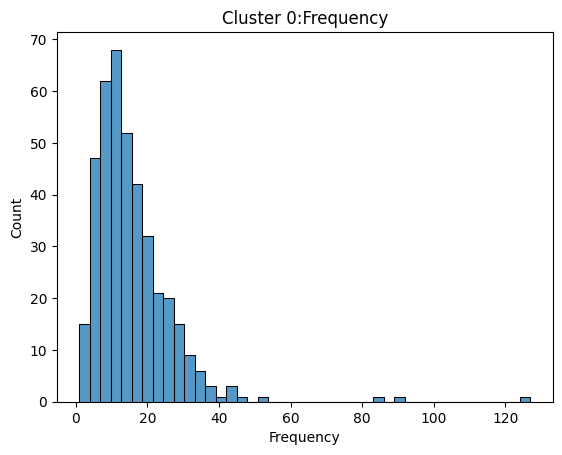

Cluster 1 Frequency data: [ 26  65 244  54]


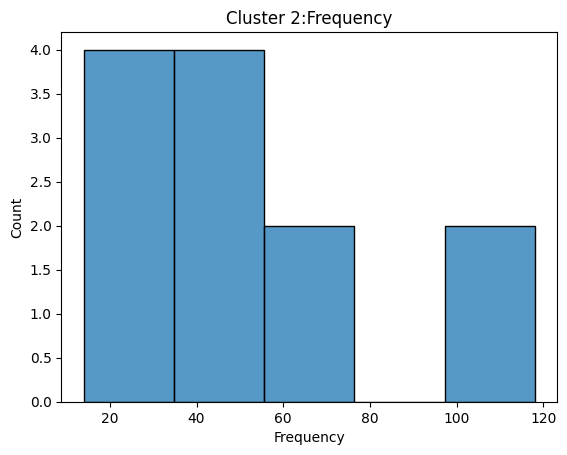

Cluster 3 Frequency data: [77 60]


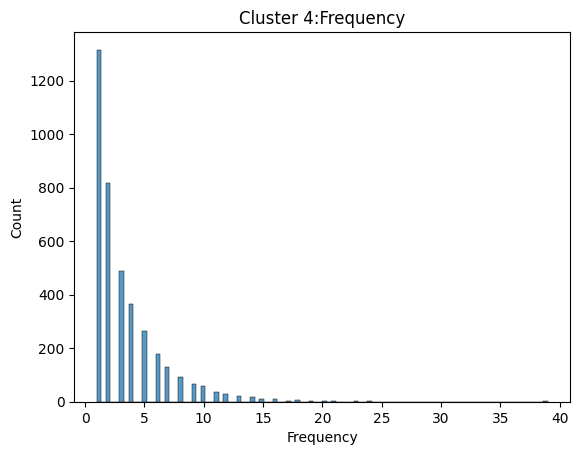

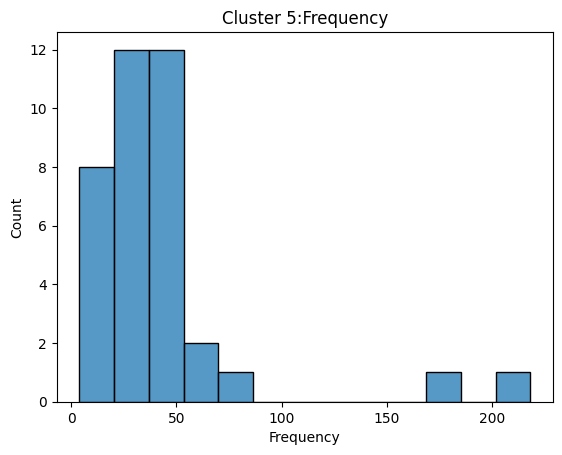

In [351]:
make_hist_plots("Frequency")

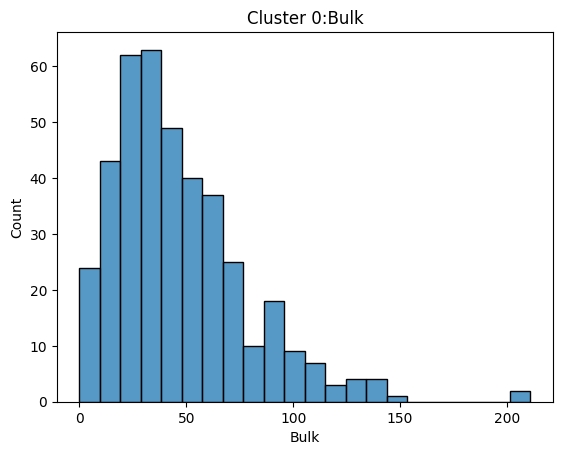

Cluster 1 Bulk data: [ 622  546 1111  281]


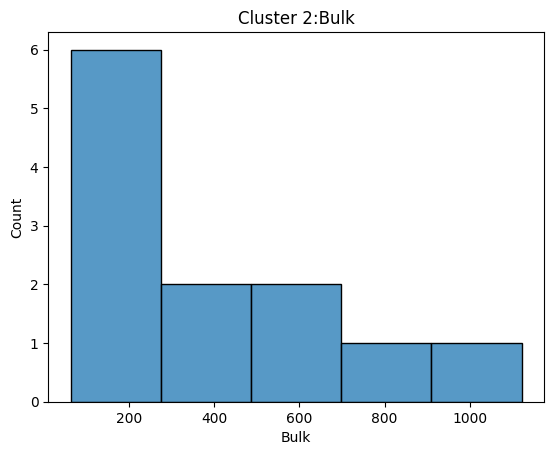

Cluster 3 Bulk data: [1689  371]


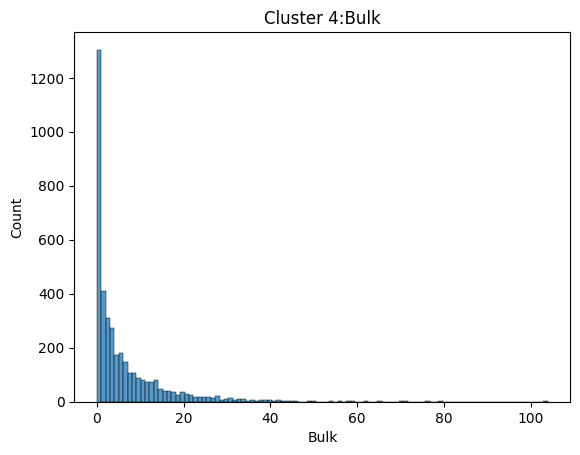

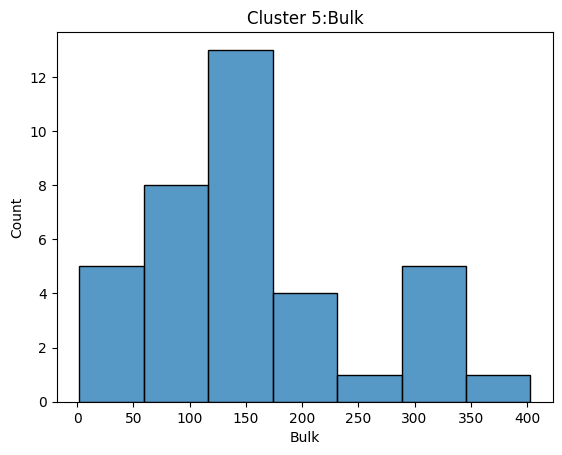

In [352]:
make_hist_plots("Bulk")

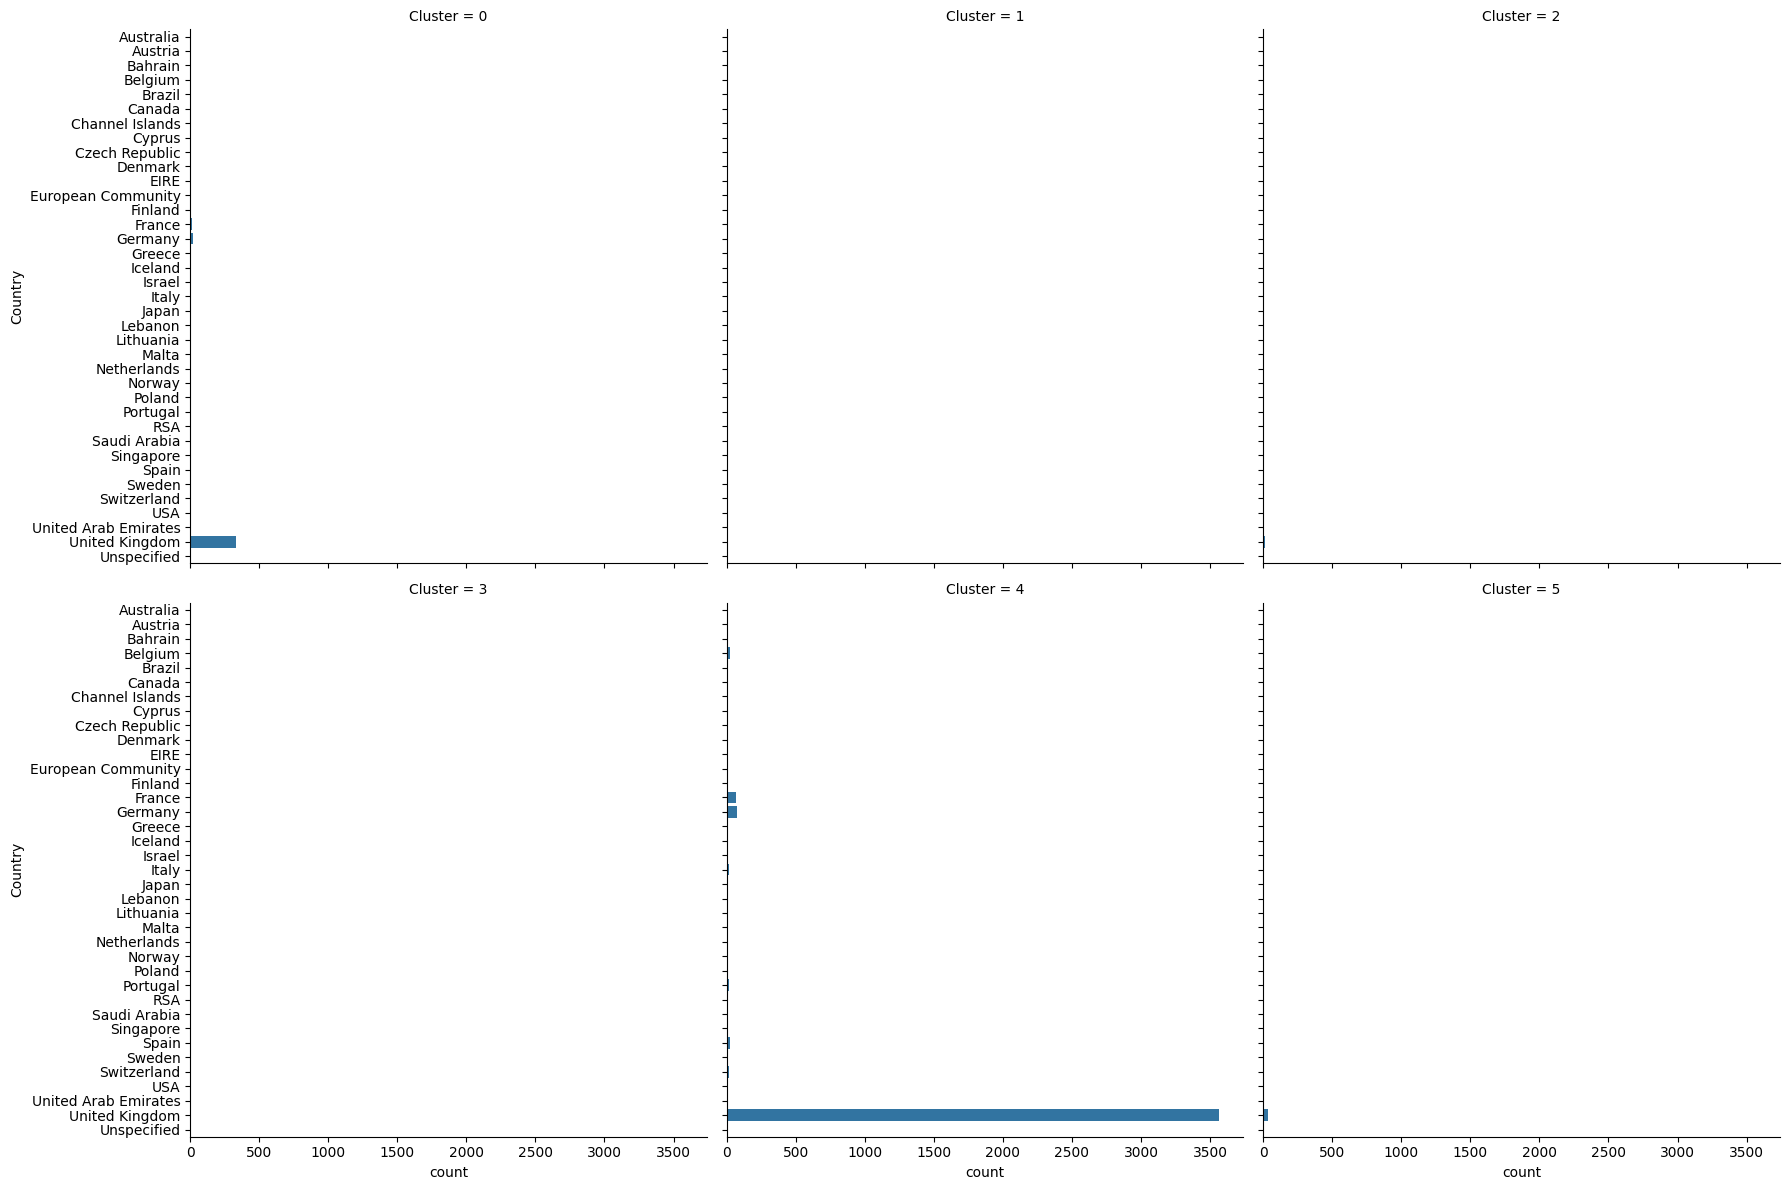

In [312]:
country_df =KMeans_df.reset_index().groupby(["Cluster", "Country"]).size().reset_index(name = "count")
country_visual = sns.FacetGrid(country_df, col = "Cluster", col_wrap= 3, height= 6)
country_visual.map(sns.barplot, "count", "Country", orient = "h", order = country_df["Country"].sort_values().unique())
plt.show()

*Cluster 0:* This cluster seem to the type of customers that just have decent activity year round but they just don't seem to buy a lot of items. We can see in their _TotalPrice_ and _Bulk_ graphs that they are very frugal compared other clusters. On average not high frequency but some of them do buy quite often. 
Perhaps with this cluster we try to have them be more frequent by advertising sales more. Since they seem to spend less perhap lower prices could catch their eye.

*Cluster1:* These customers are frequent bulk buyers. It seems from their _TotalPrice_ they do spend a lot of money. However they do not have a strong presense year round. I would go more indepth in what type of items they buy in bulk and if there is any pattern offer sales on bulk buys to retain them.

*Cluster2:* It seems like they have a more noticable presence when it comes to the months leading up to December. Just like in cluster 1 they are frequent bulk buyers but they do not spend that much money. Based on that they could be party decor or holiday presents for the holidays at the end of the year. By looking at the items they purchase we see what types of items are more common and promote sales on those or just promote sales on items commonly bought in that timeframe.

*cluster3:* They seem to be a mix of cluster 1 and 2, frequent high spenders and bulk buyers but only have presence in the month leading up to December. Thus we can pitch a combined idea of what was stated for cluster 1 and 2.

*cluster4:* Very high similarities with cluster0 except for the fact they are more frequent buyers towards the months leading up to December. Also this is the only cluster with negative _TotalPrice_ values meaning some are more dissatisfied with the products than satisfied. One key note about the cluster is that there are more customers not from U.K, in other clusters majority if not all the customers reside in the U.K. Perhaps we should tailor more product that are of those other countries liking. Additionally we should dive more deep in what products tend to be cancelled/returned. Other than that we could pitch an idea similar to cluster 0 and 2.

*cluster5:* Strong similarities to cluster 0, but with more presence year round. We can pitch an idea similar to cluster 0.

## RMF Clustering 

Another way we can cluster up the customers is by their RFM score. (Recenty Frequency and Monetary) By using the _DaysSinceRecentInvoice_ , _Frequency_, _TotalPrice_ columns we can use pd.qcut to assign the R F M score respectively. Based on the type of score we can identity what type of customers they are. For example a customer with a high monetary and frequency score is seen as a loyalist, someoone who frequently shops and spends a lot of money.

In [315]:
RMF_df = grp_cusID.copy() #make a copy of the df so it doesn't interact with the kmeans clustering data

In [316]:
RMF_df["R"] = pd.qcut(RMF_df["DaysSinceRecentInvoice"], q= 5,  labels=[5,4,3,2,1])
RMF_df["F"] = pd.qcut(RMF_df["Frequency"],q= 3, labels =[1,3,5])
#note for frequency, the values are spread out enough for 5 quantiles so we can just use 3 instead.
RMF_df["M"] = pd.qcut(RMF_df["TotalPrice"],q =5, labels = [1,2,3,4,5])
RMF_df

,,January,February,March,April,May,June,July,August,September,October,November,December,TotalPrice,Bulk,Frequency,DaysSinceRecentInvoice,R,F,M
CustomerID,Country,,,,,,,,,,,,,,,,,,,
12346,United Kingdom,2,0,0,0,0,0,0,0,0,0,0,0,0.00,1,2,325,1,1,1
12347,Iceland,29,0,0,24,0,18,0,22,0,47,0,42,4310.00,39,7,2,5,5,5
12348,Finland,6,0,0,5,0,0,0,0,3,0,0,17,1797.24,27,4,75,2,3,4
12349,Italy,0,0,0,0,0,0,0,0,0,0,73,0,1757.55,5,1,18,4,1,4
12350,Norway,0,17,0,0,0,0,0,0,0,0,0,0,334.40,1,1,310,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,United Kingdom,0,0,10,0,0,0,0,0,0,0,0,0,180.60,0,1,277,1,1,1
18281,United Kingdom,0,0,0,0,0,7,0,0,0,0,0,0,80.82,0,1,180,1,1,1
18282,United Kingdom,0,0,0,0,0,0,0,8,0,0,0,5,176.60,1,3,7,5,3,1


In [334]:
def make_plots(df,cluster):
    #Input: A dataframe and the name of the cluster we are working with
    #Output: 3 graphs about the montly purchases, the amount of bulk buys, and the countries distribution

    #Making the barplot for the months
    just_months = df.iloc[:,:12].sum()
    months_counts = pd.DataFrame(just_months, columns = ["Count"]).reset_index(names = "Month")
    sns.barplot(months_counts, x = "Count", y= "Month")
    plt.title(f"{cluster}'s Month Count Data")
    plt.show()

    #show the histogram of bulk data
    sns.histplot(df, x = "Bulk")
    plt.title(f"{cluster}'s Bulk Data")
    plt.show()

    #show the countries
    country_count = df.reset_index().groupby("Country").size().sort_index()
    plt.figure(figsize=(5,7))
    plt.title(f"{cluster}'s Country Count Data")
    sns.barplot(country_count, orient="h")
    plt.show()
     


Our first group to look into are the loyalists. These are customers with high F and M scores.

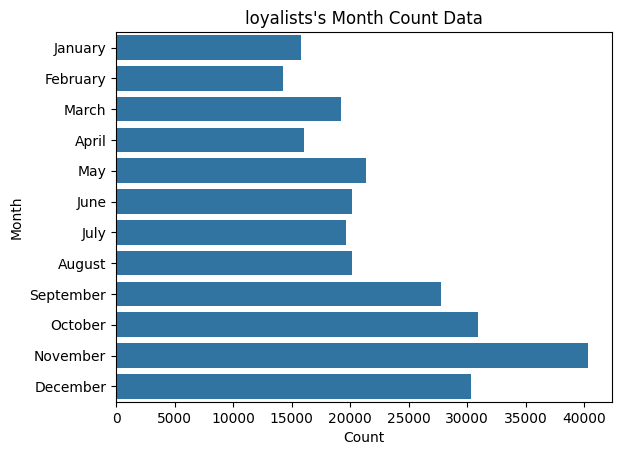

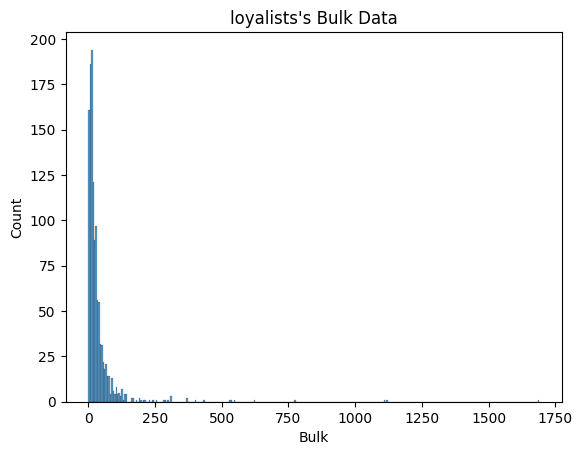

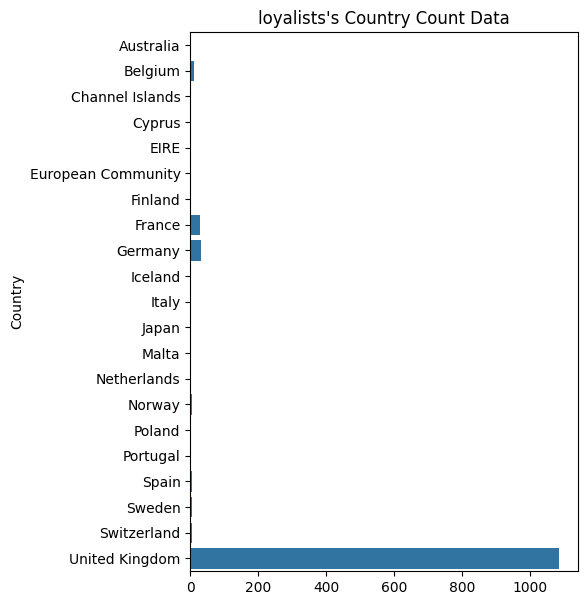

In [339]:
loyal_df = RMF_df[(RMF_df["F"] == 5) & (RMF_df["M"] >= 4)]
make_plots(loyal_df, "loyalists")

First off lets look at the monthly purchases bar chart. It seems like for loyalist they made a good amount of purchases year wide but as we saw before there is a spike in the months leading to December. We also see that there is a good amount of customers who make bulk purchases. 

Perhaps for these customers we could try to market more discounts for buying items in bulk to keep as frequent buyers. Additionally since they are buying frequently throughout the year we can forward them more sales of the holidays that happen year round. This should promote more spending from these customers since if they are already buying items frequently they would be incline to buy more if its at a discount.

Additionally we see majority of these customers are from the U.K but a small chunk are from France and Germany. We can use this info to promote more items that are of French and German people's liking to refrain that chunk of customers to go to another local site. Plus if there isn't already a shipping facility in those countries, there should be an initiative to do so to help lower shipping cost and duration. 

Another group we can look into are those may seem like potential loyalists. We can identify these as those with high F and R scores.

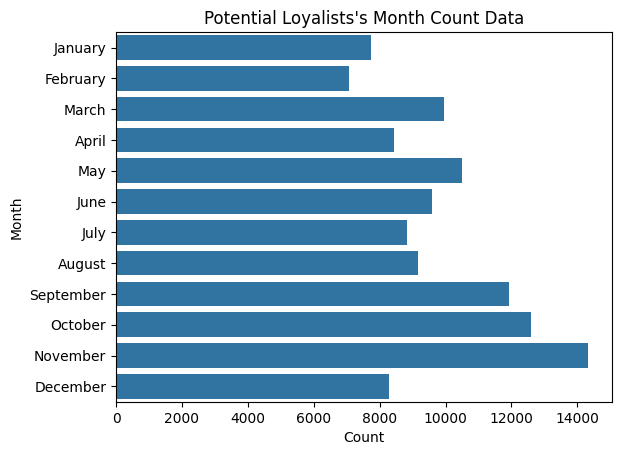

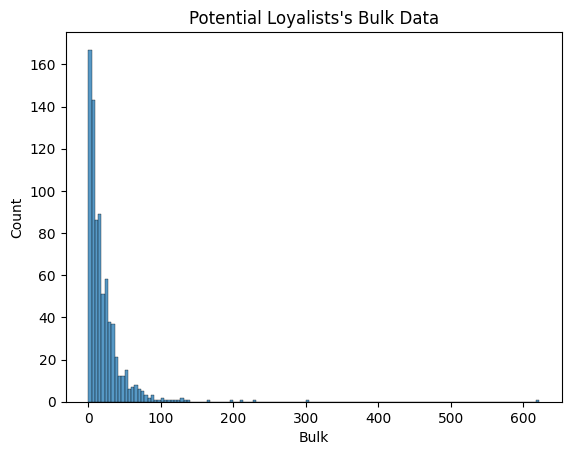

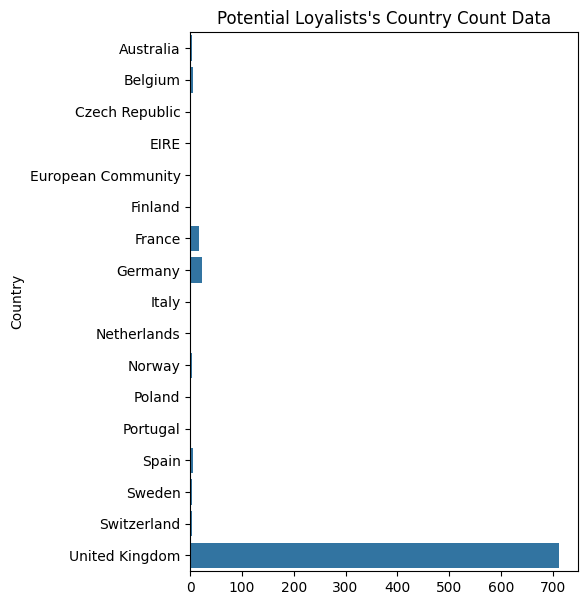

In [340]:
potent_loyal_df = RMF_df[(RMF_df["F"] == 5) & (RMF_df["R"] >= 4)]
make_plots(potent_loyal_df, "Potential Loyalists")

These potential loyal customers have the similar trends in their plots compared to the loyalists. Thus we can pitch the marketing ideas as stated in the loyalist analysis. But there is one noticable difference in the monthly purchases in that it seems bimodal. The second peak happens in the similar place, the months leading up to December, however the second peak is around the months of March, April, and May. Perhaps to maybe promote more spending from these customers we could promote more sales for the holidays that occur in that timeframe. 

Additionally the distribution of bulk buys are not as large compared to the loyalist so we could try to incentivize bulk buying. 

Another group we can look into are those who are not very active on the site. We can identity these as having a low R, F, and M scores. 

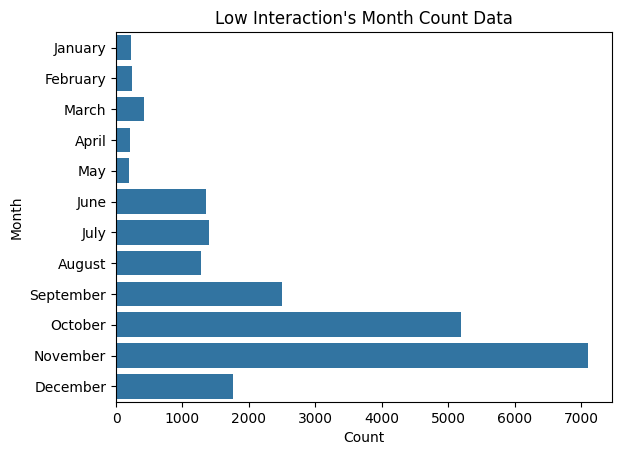

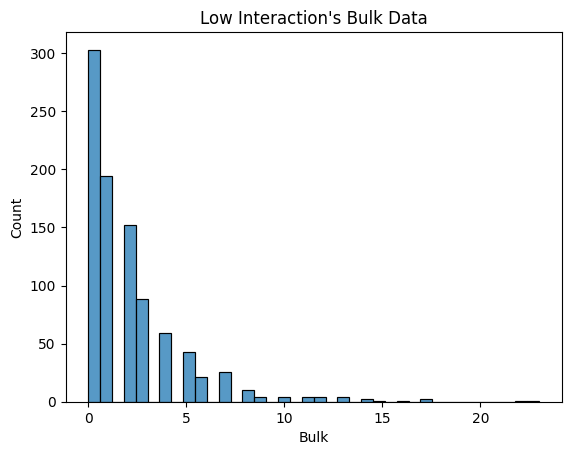

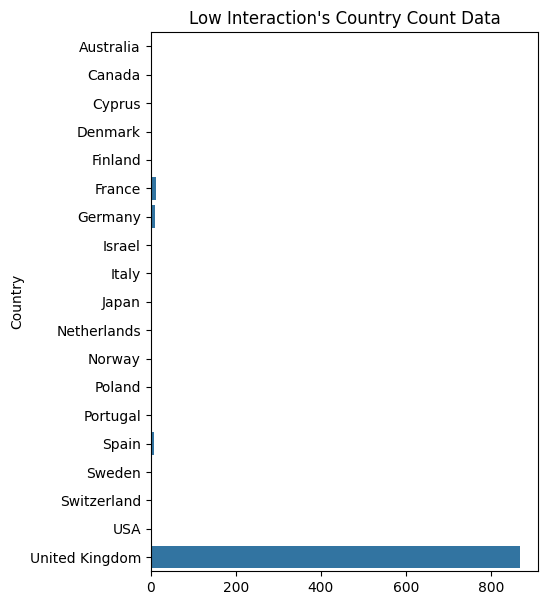

In [342]:
low_interaction_df = RMF_df[(RMF_df["F"] <= 1) & (RMF_df["R"] <= 2) & (RMF_df["M"] <= 2)]
make_plots(low_interaction_df, "Low Interaction")


Starting off with the monthly purchases, we can see that those who have low interaction follow the normal trend of having more purchases near decemeber but very low purchases at the other points in the year. So we can deduce that these customers mainly use the retail site to buy holiday gifts or end of the year items. Additionally we see that these customers are not prone to bulk buy as well. 

We can follow the same plan as with loyalist in which we should start promoting more sales about the holidays that happen year round in hope that it incentivizes them to buy more. Layering more discounts to bulk buys, targeted towards items that one usually buys for the holidays, to help them start bulk buying more.

We can also see that very little of these customers are from any other country other than the U.K so perhaps we should focus on trying to convert U.K customers to potential loyalist first before trying to target other countries.

# conclusions

After working the data one thing I wished that was included was the reasoning behind the cancellations plus if the "cancelled" order was merely a return. Based on the dataset it seems like only invoiced marked as cancelled has negative quantities and the invoice dates suggest that perhaps it was a return. For the df below there are some invoices which seems like perhaps it wasn't a cancellation but a return.

But having more info on that action would be helpful to further examine the customer buying habits and maybe see what items are selling and keeping the customer satisfy and what items are not.

Additionally it would be nice to have what category each item fell in. For example home decor or school supplies or party decor. 

In [348]:
cleaned_df[(cleaned_df["CustomerID"] == 15311) & (cleaned_df["StockCode"] == "35004C")].sort_values(by ="InvoiceDate")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311,United Kingdom,December
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05,4.65,15311,United Kingdom,December
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08,4.65,15311,United Kingdom,December
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13,4.65,15311,United Kingdom,December
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20,4.65,15311,United Kingdom,December
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05,4.65,15311,United Kingdom,January
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17,4.65,15311,United Kingdom,January
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01,4.65,15311,United Kingdom,February
